https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Dataset with 17 attributes and one binary target - did the shopper buy anything one that webvisit?

There are multiple datatypes requiring encoding and the integers/floats require normalization/standardization. 

In [9]:
import os
import json
import time
import pickle
import requests
import time
import warnings
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt

# Ignore warnings from scikit-learn to make this notebook a bit nicer
warnings.simplefilter('ignore')

# Models may be implemented as pipelines
from sklearn.pipeline import Pipeline

# Used to divide our dataseets into train/test splits
# Data will be randomly shuffled so running this notebook multiple times may lead to different results
from sklearn.model_selection import train_test_split as tts

# Visual analysis of model performance
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import classification_report
from yellowbrick.regressor import prediction_error, ResidualsPlot

# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = (9, 6)

In [2]:
df = pd.read_csv('../online_shoppers_intention.csv')

In [3]:
df.shape

(12330, 18)

In [4]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Will run this EDA two ways.  Once with existing disparity in False (did not buy) and True (did buy).  This is about 5 to 1 (see below).  And second time with a downsample.

In [6]:
X = df.drop(['Revenue'], axis=1)
y = np.array(list(df['Revenue']))
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)
X_train.shape, y_train.shape

((9864, 17), (9864,))

In [7]:
X_test.shape, y_test.shape

((2466, 17), (2466,))

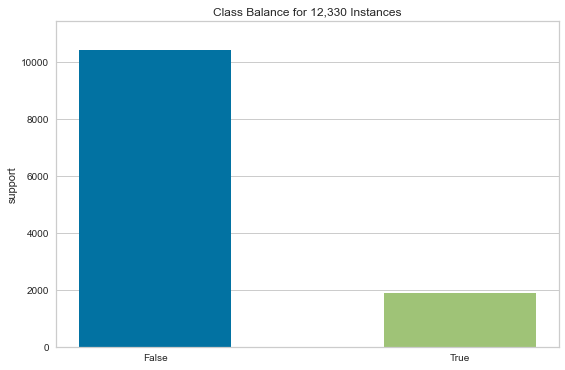

<AxesSubplot:title={'center':'Class Balance for 12,330 Instances'}, ylabel='support'>

In [8]:
#from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=["False", "True"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [10]:
#Pipeline toolset
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

#Model toolset
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge

#Evaluation toolset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances

Running through the models...

In [14]:
categorical = make_column_selector(dtype_include=np.object)
numeric = make_column_selector(dtype_include=np.int64)
numeric2 = make_column_selector(dtype_include=np.float64)
buol = make_column_selector(dtype_include=np.bool)

model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
        ('ordinal', OrdinalEncoder(), buol),
    ], remainder='drop')),
    ('clf', RandomForestClassifier())
])

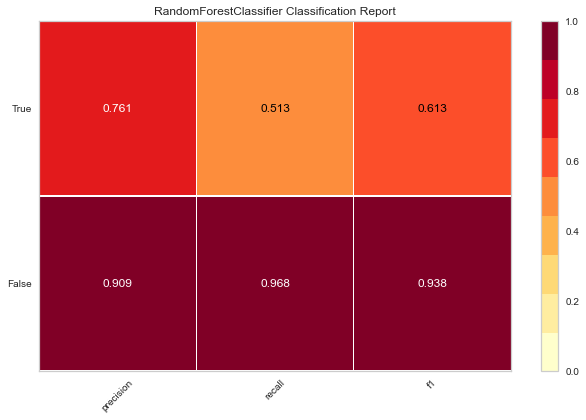

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [15]:
model.fit(X_train, y_train)

viz = ClassificationReport(model, is_fitted = True)
viz.score(X_test, y_test)
viz.show()

In [26]:
scores = cross_val_score(model, X, y, cv=StratifiedKFold(12))
scores

array([       nan, 0.88910506, 0.90175097, 0.88326848, 0.89396887,
       0.88715953, 0.87439143, 0.86757546, 0.88023369, 0.88023369,
       0.88510224, 0.8617332 ])

In [16]:
model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
        ('ordinal', OrdinalEncoder(), buol),
    ], remainder='drop')),
    ('clf', KNeighborsClassifier())
])

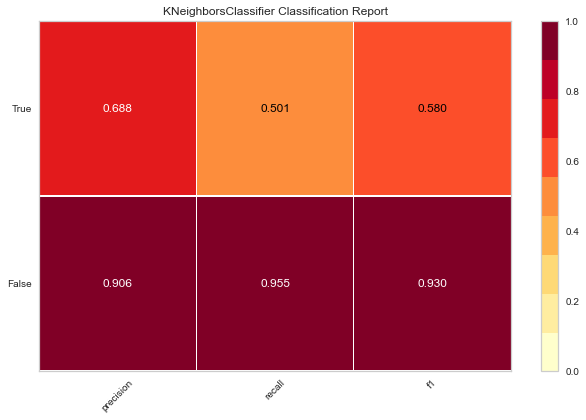

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [17]:
model.fit(X_train, y_train)

viz = ClassificationReport(model, is_fitted = True)
viz.score(X_test, y_test)
viz.show()

In [25]:
scores = cross_val_score(model, X, y, cv=StratifiedKFold(12))
scores

array([       nan, 0.88910506, 0.90175097, 0.88326848, 0.89396887,
       0.88715953, 0.87439143, 0.86757546, 0.88023369, 0.88023369,
       0.88510224, 0.8617332 ])

In [23]:
model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
        ('ordinal', OrdinalEncoder(), buol),
    ], remainder='drop')),
    ('clf', LogisticRegression(random_state=0,multi_class='ovr'))
])

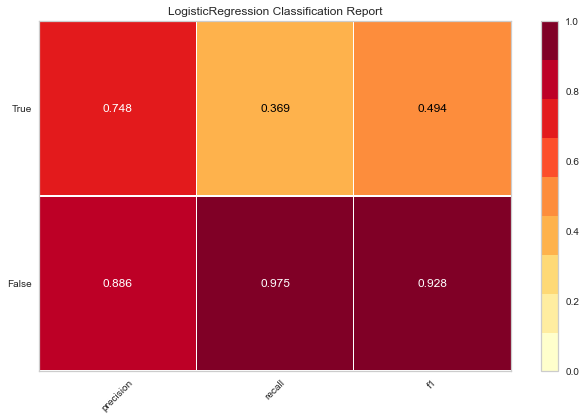

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [19]:
model.fit(X_train, y_train)

viz = ClassificationReport(model, is_fitted = True)
viz.score(X_test, y_test)
viz.show()

In [24]:
scores = cross_val_score(model, X, y, cv=StratifiedKFold(12))
scores

array([       nan, 0.88910506, 0.90175097, 0.88326848, 0.89396887,
       0.88715953, 0.87439143, 0.86757546, 0.88023369, 0.88023369,
       0.88510224, 0.8617332 ])

In [20]:
model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
        ('ordinal', OrdinalEncoder(), buol),
    ], remainder='drop')),
    ('clf', BernoulliNB())
])

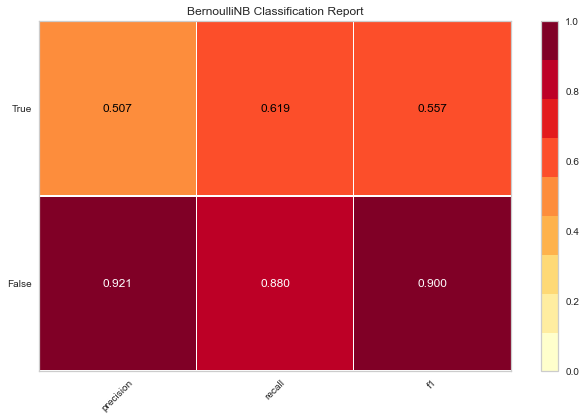

<AxesSubplot:title={'center':'BernoulliNB Classification Report'}>

In [21]:
model.fit(X_train, y_train)

viz = ClassificationReport(model, is_fitted = True)
viz.score(X_test, y_test)
viz.show()

In [22]:
scores = cross_val_score(model, X, y, cv=StratifiedKFold(12))
scores

array([       nan, 0.86478599, 0.85311284, 0.84435798, 0.81712062,
       0.83560311, 0.7429406 , 0.74780915, 0.83641675, 0.82375852,
       0.85296981, 0.80623174])

Note to self: next steps, transform df to convert object and bool dtypes to int64, float64.  Run ridge within the yellowbrick FeatureImportances module to identify the important ones.

Note to Carter, how do I get the df downsampled to even out the # of target True / False?

2nd Note to Carter, the reason I hadn't seen this code from your 'Fake News' before data cleaning was different because it came from a different place.  I have followed all of your Pre-processing steps.

In [ ]:
from sklearn.utils import resample
seed = 123
#Separate majority and minority classes
majority = df[df.Revenue=='False']
minority = df[df.Revenue=='True']

# Downsample majority class
majority_downsampled = resample(majority, 
                                replace=False, # sample without replacement
                                n_samples=len(minority), # to match minority class
                                random_state=seed) # reproducible results

# Combine minority class with downsampled majority class
df = pd.concat([majority_downsampled, minority])

# Display new class counts
df['Revenue'].value_counts()